
## Capstone Project - Live in a similar neighborhood-From Seoul to New York and Toronto
Applied Data Science Capstone by IBM/Coursera

<div class="alert alert-block alert-info" style="margin-top: 110px">

## Introduction

A lot of people plan to move. There are also many people who move abroad. There are lots of people who study abroad. Some people leave for business. What they want when they move is a familiar environment. Living in a familiar environment will help you adapt faster. Anyone who lived near the market would want the market to be close to the neighborhood they moved to. The person who often goes to the art museum in the original neighborhood would want to have an art museum in the neighborhood where he moved to. Therefore, it is important to classify and compare the characteristics of neighborhoods in particular cities through machine learning.



Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py36h5fab9bb_0         141 KB  conda-forge
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         376 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geograph

<a id='item1'></a>


## 1. Download and Explore Dataset


Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 


For your convenience, I downloaded the files and placed it on the server, so you can simply run a `wget` command and access the data. So let's go ahead and do that.


In [2]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


#### Load and explore the data


Next, let's load the data.


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.


In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the _features_ key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.


In [5]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.


In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a _pandas_ dataframe


The next task is essentially transforming this data of nested Python dictionaries into a _pandas_ dataframe. So let's start by creating an empty dataframe.


In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.


In [8]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.


In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.


In [10]:
neighborhoods.head(12)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.


In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.


In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.


In [12]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.


In [13]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.


However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.


In [14]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


Let's get the geographical coordinates of Manhattan.


In [15]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


As we did with all of New York City, let's visualizat Manhattan the neighborhoods in it.


In [16]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.


#### Define Foursquare Credentials and Version


In [17]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = 'FPG1QR51MSXLF5UTJNKZOUEAAPMCOR500TT3SUFLYNWOCJHT' 
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OZGTEVWYBTM3S2QI0LTIW3G4SRR3KJ45TC255JCRJMRRXBYD
CLIENT_SECRET:K2TW3JJ5LRB4FHZ5SF2MVBQZ0MVYV5IEQGUH2NGEEMMM215S


#### Let's explore the first neighborhood in our dataframe.


Get the neighborhood's name.


In [18]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

Get the neighborhood's latitude and longitude values.


In [19]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.


First, let's create the GET request URL. Name your URL **url**.


In [20]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=OZGTEVWYBTM3S2QI0LTIW3G4SRR3KJ45TC255JCRJMRRXBYD&client_secret=K2TW3JJ5LRB4FHZ5SF2MVBQZ0MVYV5IEQGUH2NGEEMMM215S&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

Double-click **here** for the solution.

<!-- The correct answer is:
LIMIT = 100 # limit of number of venues returned by Foursquare API
-->

<!--
radius = 500 # define radius
-->

<!--
\\\\ # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
--> 


Send the GET request and examine the resutls


In [21]:
results = requests.get(url).json()


From the Foursquare lab in the previous module, we know that all the information is in the _items_ key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.


In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a _pandas_ dataframe.


In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Rite Aid,Pharmacy,40.875467,-73.908906
4,Subway,Sandwich Place,40.874667,-73.909586


And how many venues were returned by Foursquare?


In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

23 venues were returned by Foursquare.


<a id='item2'></a>


## 2. Explore Neighborhoods in Manhattan


#### Let's create a function to repeat the same process to all the neighborhoods in Manhattan


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

manhattan_data#### Now write the code to run the above function on each neighborhood and create a new dataframe called _manhattan_venues_.


In [26]:
# type your answer here
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude'])

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


Double-click **here** for the solution.

<!-- The correct answer is:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )
--> 


#### Let's check the size of the resulting dataframe


In [27]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3250, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Rite Aid,40.875467,-73.908906,Pharmacy
4,Marble Hill,40.876551,-73.91066,Subway,40.874667,-73.909586,Sandwich Place


Let's check how many venues were returned for each neighborhood


In [28]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,86,86,86,86,86,86
Carnegie Hill,91,91,91,91,91,91
Central Harlem,45,45,45,45,45,45
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,40,40,40,40,40,40
East Village,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues


In [29]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 331 uniques categories.


<a id='item3'></a>


## 3. Analyze Each Neighborhood


In [30]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Peruvian Roast Chicken Joint,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,South Am

And let's examine the new dataframe size.


In [31]:
manhattan_onehot.shape

(3250, 332)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [32]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()


#### Let's confirm the new size


#### Let's print each neighborhood along with the top 5 most common venues


#### Let's put that into a _pandas_ dataframe


First, let's write a function to sort the venues in descending order.


In [33]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Clothing Store,Women's Store,Gym,Playground,Memorial Site,Ice Cream Shop,BBQ Joint
1,Carnegie Hill,Coffee Shop,Café,Wine Shop,Bookstore,Pizza Place,Gym / Fitness Center,Yoga Studio,Bar,Cocktail Bar,Sushi Restaurant
2,Central Harlem,French Restaurant,Chinese Restaurant,Bar,Public Art,Gym / Fitness Center,Seafood Restaurant,American Restaurant,African Restaurant,Boutique,Library
3,Chelsea,Art Gallery,Bakery,Coffee Shop,Wine Shop,French Restaurant,American Restaurant,Theater,Ice Cream Shop,Italian Restaurant,Nightclub
4,Chinatown,Bakery,Chinese Restaurant,Cocktail Bar,Dessert Shop,Optical Shop,American Restaurant,Noodle House,Spa,Dumpling Restaurant,Sandwich Place


<a id='item4'></a>


## 4. Cluster Neighborhoods


Run _k_-means to cluster the neighborhood into 5 clusters.


In [35]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_NY = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe


In [36]:
np.unique(kmeans_NY.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [37]:
manhattan_grouped_clustering.head()

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Peruvian Roast Chicken Joint,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restau

In [38]:
manhattan_store_type=manhattan_grouped_clustering.columns.values


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [39]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans_NY.labels_)

manhattan_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Sandwich Place,Gym,Yoga Studio,Bank,Pizza Place,Diner,Discount Store,Pharmacy,Donut Shop
1,Manhattan,Chinatown,40.715618,-73.994279,1,Bakery,Chinese Restaurant,Cocktail Bar,Dessert Shop,Optical Shop,American Restaurant,Noodle House,Spa,Dumpling Restaurant,Sandwich Place
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Café,Bakery,Pizza Place,Bank,Mobile Phone Shop,Supplement Shop,Tapas Restaurant,Park,Spanish Restaurant,Deli / Bodega
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Café,Restaurant,Lounge,Bakery,Park,Caribbean Restaurant,Chinese Restaurant,Pizza Place,Wine Bar
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Pizza Place,Café,Coffee Shop,Mexican Restaurant,Deli / Bodega,Yoga Studio,Latin American Restaurant,Liquor Store,Sushi Restaurant,Cocktail Bar


In [40]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Battery Park City,Park,Coffee Shop,Hotel,Clothing Store,Women's Store,Gym,Playground,Memorial Site,Ice Cream Shop,BBQ Joint
1,2,Carnegie Hill,Coffee Shop,Café,Wine Shop,Bookstore,Pizza Place,Gym / Fitness Center,Yoga Studio,Bar,Cocktail Bar,Sushi Restaurant
2,2,Central Harlem,French Restaurant,Chinese Restaurant,Bar,Public Art,Gym / Fitness Center,Seafood Restaurant,American Restaurant,African Restaurant,Boutique,Library
3,1,Chelsea,Art Gallery,Bakery,Coffee Shop,Wine Shop,French Restaurant,American Restaurant,Theater,Ice Cream Shop,Italian Restaurant,Nightclub
4,1,Chinatown,Bakery,Chinese Restaurant,Cocktail Bar,Dessert Shop,Optical Shop,American Restaurant,Noodle House,Spa,Dumpling Restaurant,Sandwich Place


In [41]:
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [42]:
neighborhoods_venues_sorted.set_index('Neighborhood').head()

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,
Battery Park City,2,Park,Coffee Shop,Hotel,Clothing Store,Women's Store,Gym,Playground,Memorial Site,Ice Cream Shop,BBQ Joint
Carnegie Hill,2,Coffee Shop,Café,Wine Shop,Bookstore,Pizza Place,Gym / Fitness Center,Yoga Studio,Bar,Cocktail Bar,Sushi Restaurant
Central Harlem,2,French Restaurant,Chinese Restaurant,Bar,Public Art,Gym / Fitness Center,Seafood Restaurant,American Restaurant,African Restaurant,Boutique,Library
Chelsea,1,Art Gallery,Bakery,Coffee Shop,Wine Shop,French Restaurant,American Restaurant,Theater,Ice Cream Shop,Italian Restaurant,Nightclub
Chinatown,1,Bakery,Chinese Restaurant,Cocktail Bar,Dessert Shop,Optical Shop,American Restaurant,Noodle House,Spa,Dumpling Restaurant,Sandwich Place


Finally, let's visualize the resulting clusters


In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>


## 5. Examine Clusters


In [44]:
from matplotlib import pyplot as plt

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.


#### Cluster 1


In [45]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Midtown South,Korean Restaurant,Hotel,Gym / Fitness Center,American Restaurant,Dessert Shop,Coffee Shop,Cosmetics Shop,Cuban Restaurant,Karaoke Bar,Italian Restaurant


<BarContainer object of 10 artists>

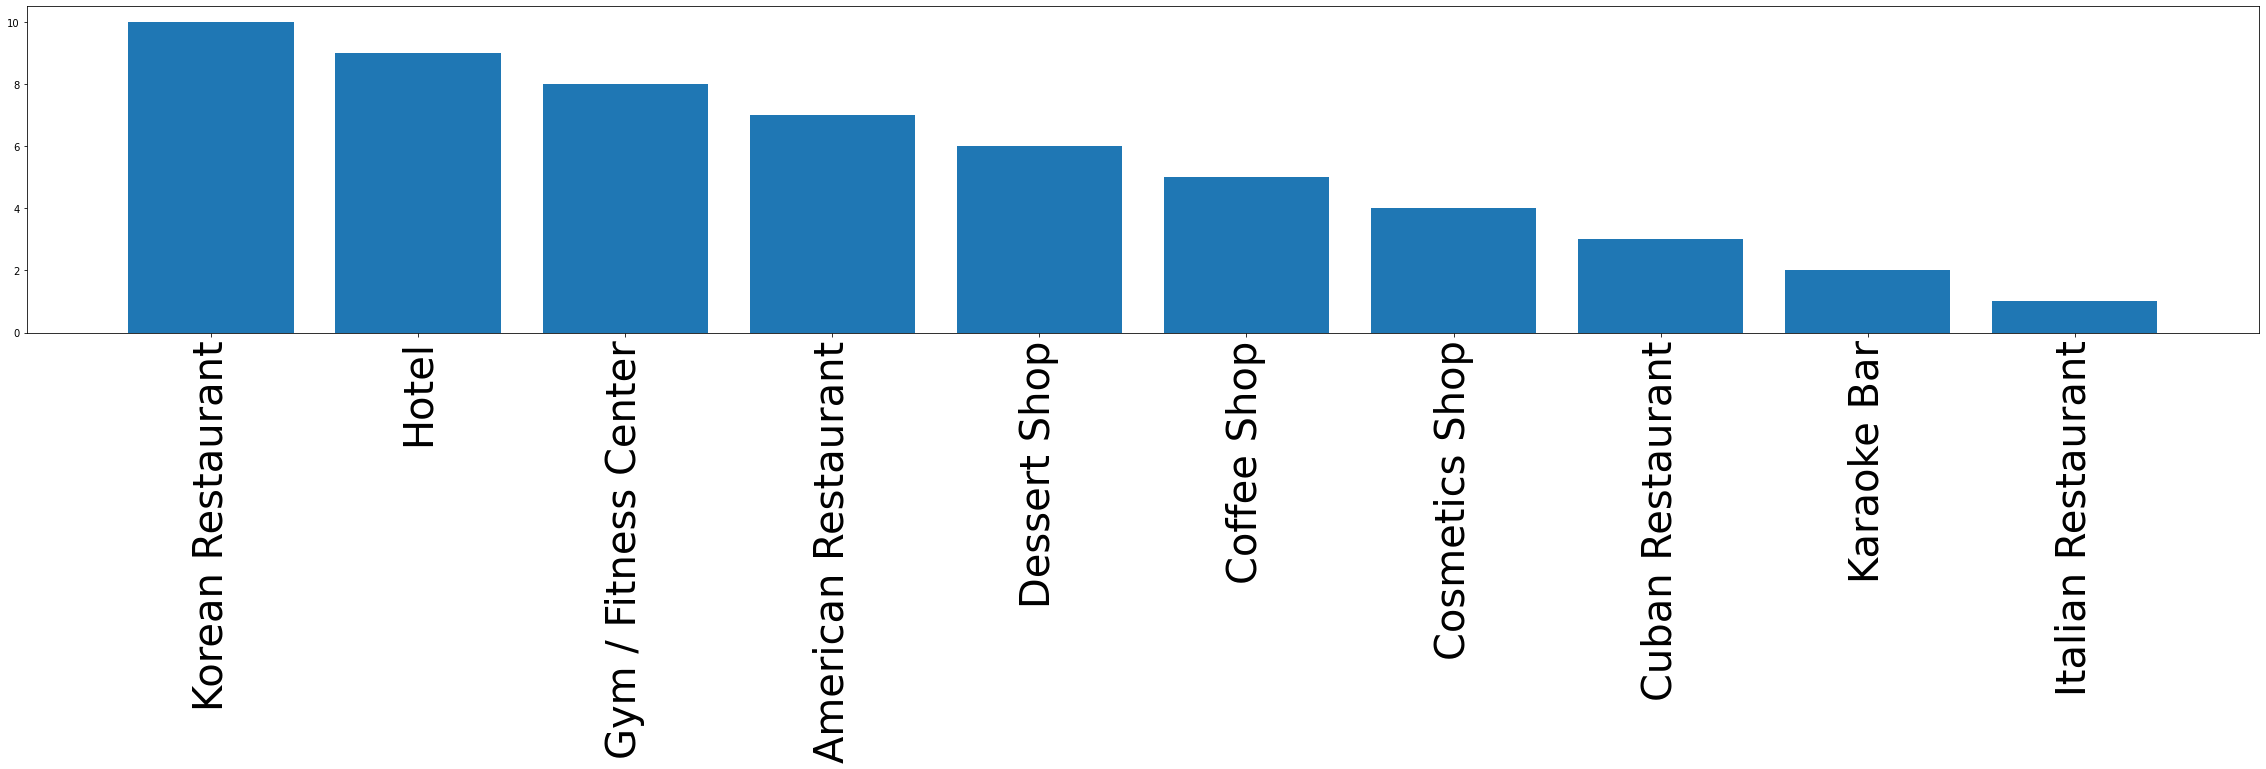

In [134]:
dfdf=manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]].T.reset_index()
Cluster=pd.DataFrame(data=0,columns=manhattan_store_type, index=['score'])
len2=len(dfdf.columns.values)
True_count=0
for i in range(11):
    for j in manhattan_store_type:
        if (dfdf.iloc[i,:] ==j).any(): 
            True_count=len2-pd.Series.value_counts(dfdf.loc[i,:] ==j)[False]
            Cluster[j]+=True_count*(11-i)
            
Cluster_reshape=Cluster.T[Cluster.T["score"]!=0].sort_values(by=['score'],ascending=False).T            
plt.figure(figsize=(40,6))
plt.xticks(rotation =90,size=40)
plt.bar(Cluster_reshape.columns,Cluster_reshape.iloc[0,:])            

#### Cluster 2


In [47]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Bakery,Chinese Restaurant,Cocktail Bar,Dessert Shop,Optical Shop,American Restaurant,Noodle House,Spa,Dumpling Restaurant,Sandwich Place
13,Lincoln Square,Plaza,Café,Theater,Concert Hall,Performing Arts Venue,Coffee Shop,Bakery,Gym,Gym / Fitness Center,American Restaurant
15,Midtown,Coffee Shop,Hotel,Theater,Clothing Store,Cuban Restaurant,Bakery,Sushi Restaurant,Bookstore,Mediterranean Restaurant,Gym
17,Chelsea,Art Gallery,Bakery,Coffee Shop,Wine Shop,French Restaurant,American Restaurant,Theater,Ice Cream Shop,Italian Restaurant,Nightclub
18,Greenwich Village,Italian Restaurant,Clothing Store,Sushi Restaurant,Indian Restaurant,Dessert Shop,Café,Coffee Shop,Japanese Restaurant,Seafood Restaurant,Pizza Place
20,Lower East Side,Art Gallery,Chinese Restaurant,Latin American Restaurant,Pizza Place,Ramen Restaurant,Bakery,Café,Yoga Studio,Filipino Restaurant,Bike Rental / Bike Share
22,Little Italy,Bakery,Café,Italian Restaurant,Ice Cream Shop,Chinese Restaurant,Coffee Shop,Cocktail Bar,Sandwich Place,Salon / Barbershop,Hotel
23,Soho,Clothing Store,Italian Restaurant,Boutique,Mediterranean Restaurant,Bakery,Shoe Store,Hotel,Coffee Shop,Salon / Barbershop,Sporting Goods Shop
31,Noho,Cocktail Bar,Grocery Store,Pizza Place,Hotel,Italian Restaurant,French Restaurant,Sushi Restaurant,Mexican Restaurant,Coffee Shop,Bookstore


<BarContainer object of 12 artists>

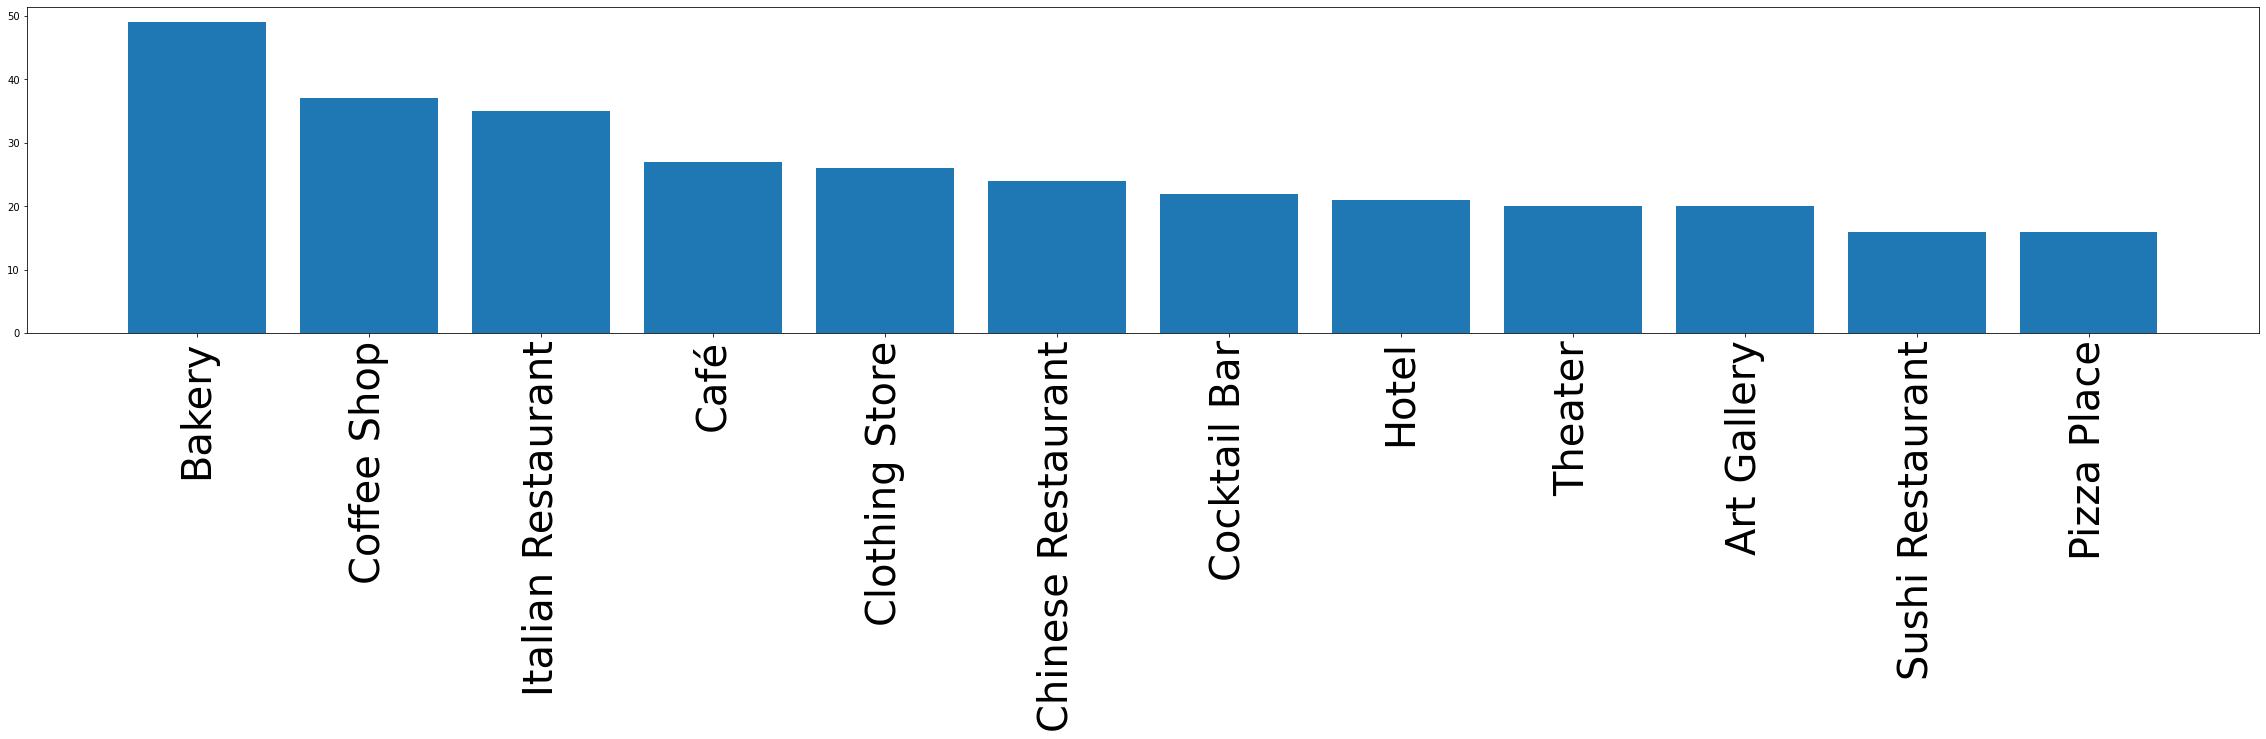

In [180]:
dfdf=manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]].T.reset_index()
Cluster=pd.DataFrame(data=0,columns=manhattan_store_type, index=['score'])
len2=len(dfdf.columns.values)
True_count=0
for i in range(11):
    for j in manhattan_store_type:
        if (dfdf.iloc[i,:] ==j).any(): 
            True_count=len2-pd.Series.value_counts(dfdf.loc[i,:] ==j)[False]
            Cluster[j]+=True_count*(11-i)
            
Cluster_reshape=Cluster.T[Cluster.T["score"]!=0].sort_values(by=['score'],ascending=False).T            
plt.figure(figsize=(40,6))
plt.xticks(rotation =90,size=40)
plt.bar(Cluster_reshape.columns[:12],Cluster_reshape.iloc[0,:12])            

In [49]:
len(dfdf.columns.values)

10

#### Cluster 3


In [50]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Sandwich Place,Gym,Yoga Studio,Bank,Pizza Place,Diner,Discount Store,Pharmacy,Donut Shop
5,Manhattanville,Deli / Bodega,Coffee Shop,Seafood Restaurant,Chinese Restaurant,Mexican Restaurant,Italian Restaurant,Bar,Sushi Restaurant,Supermarket,Burger Joint
6,Central Harlem,French Restaurant,Chinese Restaurant,Bar,Public Art,Gym / Fitness Center,Seafood Restaurant,American Restaurant,African Restaurant,Boutique,Library
8,Upper East Side,Exhibit,Italian Restaurant,American Restaurant,Gym / Fitness Center,Bakery,Juice Bar,Yoga Studio,Art Gallery,Pizza Place,Hotel
9,Yorkville,Italian Restaurant,Coffee Shop,Bar,Japanese Restaurant,Deli / Bodega,Gym,Mexican Restaurant,Diner,Sushi Restaurant,Pizza Place
10,Lenox Hill,Italian Restaurant,Pizza Place,Sushi Restaurant,Café,Coffee Shop,Cocktail Bar,Burger Joint,Gym / Fitness Center,Deli / Bodega,Gym
11,Roosevelt Island,Deli / Bodega,Park,Coffee Shop,Japanese Restaurant,Soccer Field,Greek Restaurant,Metro Station,Supermarket,Monument / Landmark,Playground
12,Upper West Side,Italian Restaurant,Bakery,Wine Bar,Mediterranean Restaurant,Bar,Café,Coffee Shop,Dessert Shop,Indian Restaurant,Ice Cream Shop
14,Clinton,Italian Restaurant,Coffee Shop,Sandwich Place,Theater,American Restaurant,Gym / Fitness Center,Spa,Hotel,Gym,Cocktail Bar
16,Murray Hill,Coffee Shop,Hotel,Japanese Restaurant,American Restaurant,Sandwich Place,Taco Place,Gym / Fitness Center,Sushi Restaurant,Pizza Place,Bar


In [138]:
Cluster_reshape.head()

,Coffee Shop,Italian Restaurant,American Restaurant,Pizza Place,Gym / Fitness Center,Park,Bar,Café,Japanese Restaurant,Mexican Restaurant,Sandwich Place,Deli / Bodega,Hotel,Gym,Wine Bar,Cocktail Bar,Seafood Restaurant,Spa,Yoga Studio,Sushi Restaurant,French Restaurant,Bookstore,Playground,Chinese Restaurant,Wine Shop,Bakery,Ice Cream Shop,New American Restaurant,Thai Restaurant,Diner,Exhibit,Greek Restaurant,Burger Joint,Mediterranean Restaurant,Juice Bar,Indian Restaurant,Steakhouse,Clothing Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Public Art,Bagel Shop,Theater,Bank,Soccer Field,Women's Store,Supermarket,Taco Place,Falafel Restaurant,Metro Station,Furniture / Home Store,Art Gallery,Ramen Restaurant,Dessert Shop,African Restaurant,Discount Store,Memorial Site,Pharmacy,Spanish Restaurant,Hawaiian Restaurant,Korean Restaurant,Lebanese Restaurant,Boutique,Scenic Lookout,Outdoor Sculpture,Monument / Landmark,BBQ Joint,Library,Basketball Court,Hill,Cosmetics Shop,Turkish Restaurant,Grocery Store,Garden,Donut Shop,Dog Run,Salad Place
score,157,126,88,71,70,67,58,54,38,36,33,32,32,32,29,28,21,21,20,19,18,17,17,16,15,15,14,13,13,11,10,10,10,9,9,8,8,7,7,7,7,7,7,6,6,6,5,5,5,4,4,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1


<BarContainer object of 12 artists>

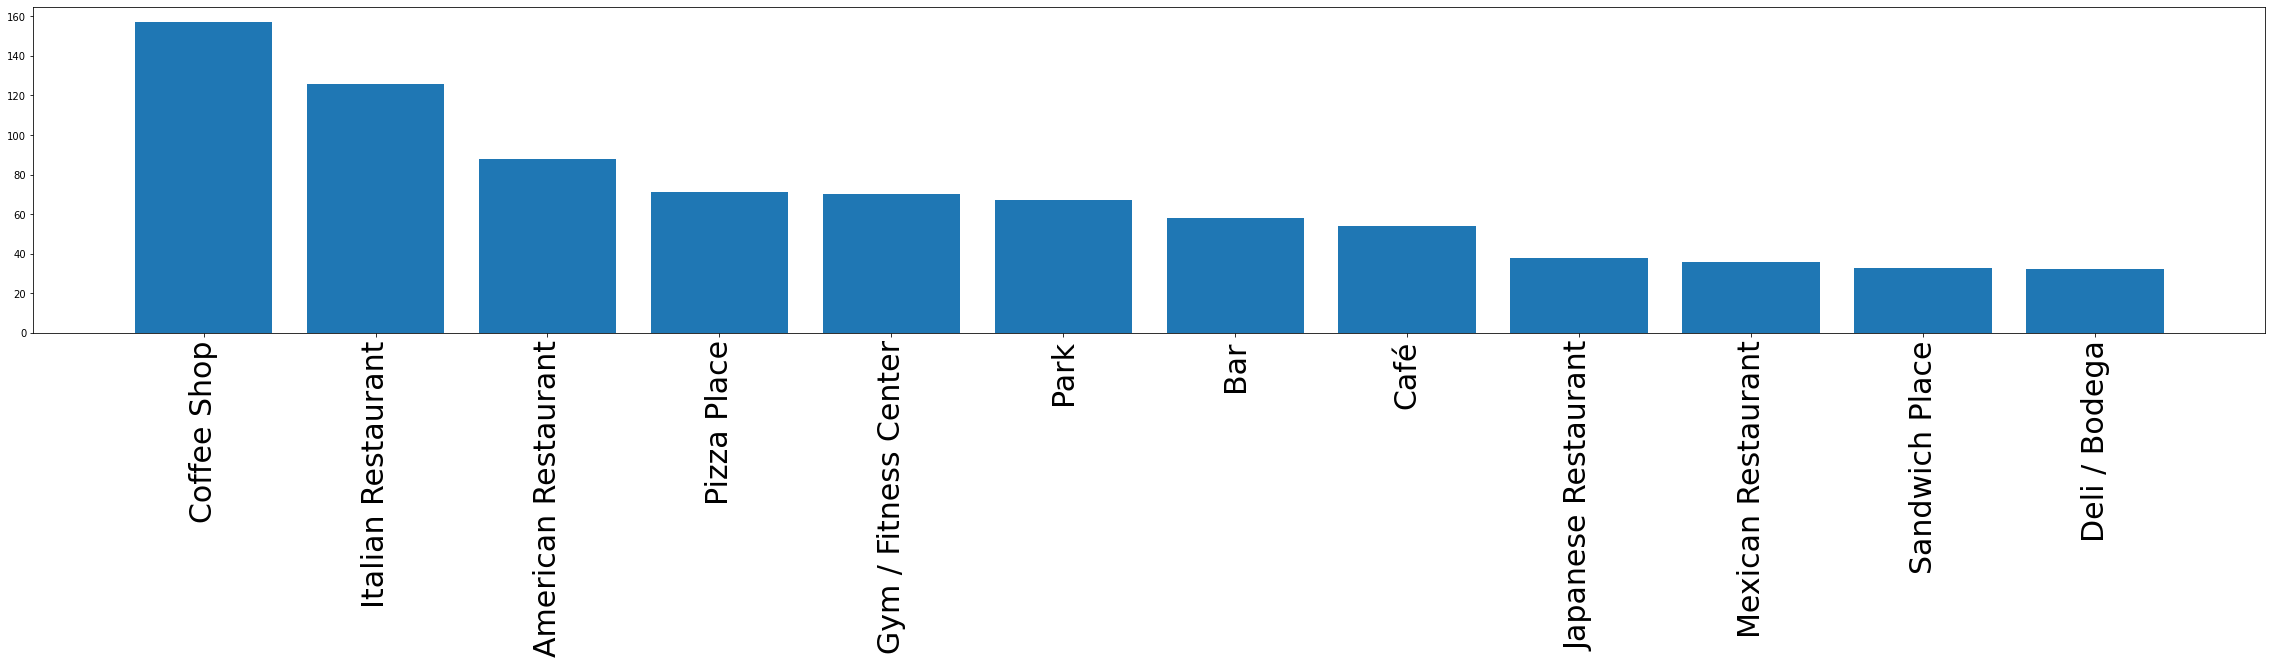

In [139]:
dfdf=manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]].T.reset_index()
Cluster=pd.DataFrame(data=0,columns=manhattan_store_type, index=['score'])
len2=len(dfdf.columns.values)
True_count=0
for i in range(11):
    for j in manhattan_store_type:
        if (dfdf.iloc[i,:] ==j).any(): 
            True_count=len2-pd.Series.value_counts(dfdf.loc[i,:] ==j)[False]
            Cluster[j]+=True_count*(11-i)
            
Cluster_reshape=Cluster.T[Cluster.T["score"]!=0].sort_values(by=['score'],ascending=False).T            
plt.figure(figsize=(40,6))
plt.xticks(rotation =90,size=30)
plt.bar(Cluster_reshape.columns[0:12],Cluster_reshape.iloc[0,0:12])            

#### Cluster 4


In [52]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Pizza Place,Bank,Mobile Phone Shop,Supplement Shop,Tapas Restaurant,Park,Spanish Restaurant,Deli / Bodega
3,Inwood,Mexican Restaurant,Café,Restaurant,Lounge,Bakery,Park,Caribbean Restaurant,Chinese Restaurant,Pizza Place,Wine Bar
4,Hamilton Heights,Pizza Place,Café,Coffee Shop,Mexican Restaurant,Deli / Bodega,Yoga Studio,Latin American Restaurant,Liquor Store,Sushi Restaurant,Cocktail Bar
7,East Harlem,Mexican Restaurant,Thai Restaurant,Bakery,Deli / Bodega,Pizza Place,Pharmacy,Park,Sandwich Place,Latin American Restaurant,Steakhouse


<BarContainer object of 26 artists>

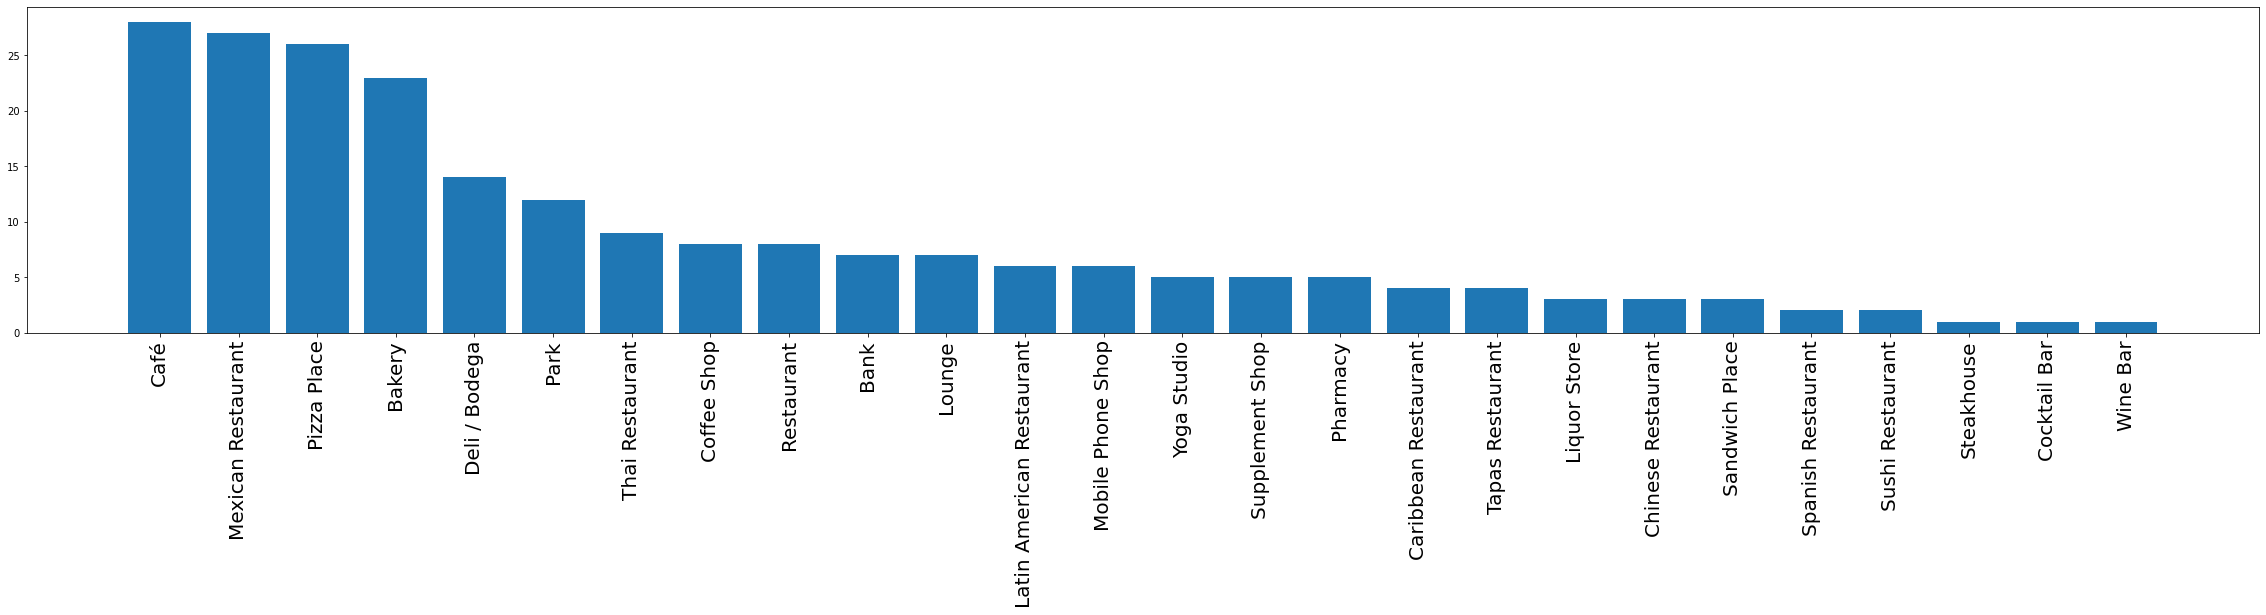

In [53]:
dfdf=manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]].T.reset_index()
Cluster=pd.DataFrame(data=0,columns=manhattan_store_type, index=['score'])
len2=len(dfdf.columns.values)
True_count=0
for i in range(11):
    for j in manhattan_store_type:
        if (dfdf.iloc[i,:] ==j).any(): 
            True_count=len2-pd.Series.value_counts(dfdf.loc[i,:] ==j)[False]
            Cluster[j]+=True_count*(11-i)
            
Cluster_reshape=Cluster.T[Cluster.T["score"]!=0].sort_values(by=['score'],ascending=False).T            
plt.figure(figsize=(40,6))
plt.xticks(rotation =90,size=20)
plt.bar(Cluster_reshape.columns,Cluster_reshape.iloc[0,:])            

#### Cluster 5


In [54]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Park,Bar,Coffee Shop,Heliport,Fountain,German Restaurant,Boat or Ferry,Bistro,Gym / Fitness Center,Farmers Market


<BarContainer object of 10 artists>

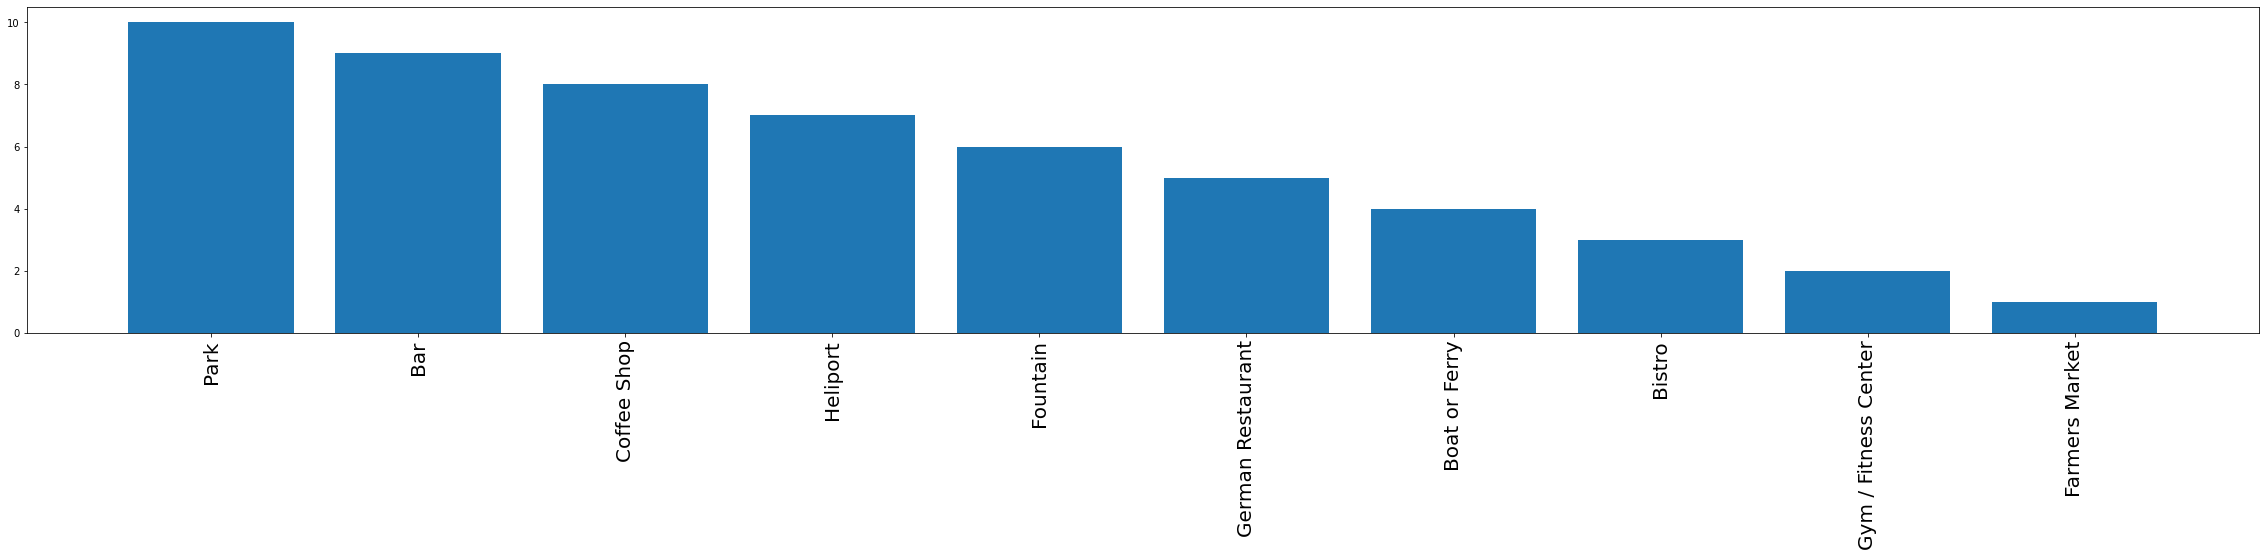

In [55]:
dfdf=manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]].T.reset_index()
Cluster=pd.DataFrame(data=0,columns=manhattan_store_type, index=['score'])
len2=len(dfdf.columns.values)
True_count=0
for i in range(11):
    for j in manhattan_store_type:
        if (dfdf.iloc[i,:] ==j).any(): 
            True_count=len2-pd.Series.value_counts(dfdf.loc[i,:] ==j)[False]
            Cluster[j]+=True_count*(11-i)
            
Cluster_reshape=Cluster.T[Cluster.T["score"]!=0].sort_values(by=['score'],ascending=False).T            
plt.figure(figsize=(40,6))
plt.xticks(rotation =90,size=20)
plt.bar(Cluster_reshape.columns,Cluster_reshape.iloc[0,:])            

Let's go to CANADA!!!!!

In [56]:

print('Libraries imported.')
! pip install beautifulsoup4
from bs4 import BeautifulSoup
import requests
import pandas as pd

Libraries imported.
     |████████████████████████████████| 122kB 24.9MB/s eta 0:00:01


In [57]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
request= requests.get(url).text
soup = BeautifulSoup(request, 'html.parser')
column_names = ['Postal code','Borough','Neighborhood']
df=pd.DataFrame(columns=column_names)
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):  #there is information in 'td'
    cell = {} 
    if row.span.text=='Not assigned':  #skip not assigned postal code text
        pass  
    else:
        cell['Postal Code'] = row.p.text[:3]  #first 3 character is postal code
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ') #remove ( and connect text with ","
        table_contents.append(cell)

df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [58]:
! pip install geocoder


     |████████████████████████████████| 102kB 966kB/s ta 0:00:01


In [59]:
url2="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv"

In [60]:
df2=pd.read_csv(url2)

df_merge=pd.merge(df,df2,on="Postal Code")

In [61]:
df_Toronto=df_merge[df_merge['Borough'].str.contains('Toronto')]
df_Toronto=df_Toronto.reset_index(drop=True)
aa=df_Toronto["Neighborhood"].unique()
aa=pd.DataFrame(sorted(aa))



In [62]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [63]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = 'FPG1QR51MSXLF5UTJNKZOUEAAPMCOR500TT3SUFLYNWOCJHT' 
VERSION = '20180605' # Foursquare API version
LIMIT = 77 # A default Foursquare API limit value

In [64]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
      
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [65]:
Toronto_venues = getNearbyVenues(names=df_Toronto['Neighborhood'],
                                   latitudes=df_Toronto['Latitude'],
                                   longitudes=df_Toronto['Longitude'])

In [66]:
Toronto_venues = getNearbyVenues(names=df_Toronto['Neighborhood'],
                                   latitudes=df_Toronto['Latitude'],
                                   longitudes=df_Toronto['Longitude'])
T_OH=pd.get_dummies(Toronto_venues[["Venue Category"]],prefix="", prefix_sep="")
T_OH.drop("Neighborhood",axis=1,inplace=True)
T_OH.insert(0,"Neighborhood",Toronto_venues["Neighborhood"])
T_OH.shape
T_OH_group=T_OH.groupby("Neighborhood").mean()

In [167]:
Top11=pd.DataFrame(columns=["first","second","third","forth",'fifth','6th','7th','8th','9th','10th','11th'])


In [168]:
#Top11["Neighborhood"]=T_OH_group.T.columns
for i in range(len(T_OH_group.T.columns)):
   
    a=T_OH_group.T.iloc[:,i].sort_values(ascending=False).head(11)
    Top11.loc[len(Top11)]=a.index.values
   
Top11.loc[:,"Neighborhood"]=T_OH_group.T.columns    

fixed_columns = [Top11.columns[-1]] + list(Top11.columns[:-1])
Top11 = Top11[fixed_columns]


In [169]:
Top11.reset_index(drop=True,inplace=True)

kclusters = 5

kmeans_Toronto = KMeans(n_clusters=kclusters, random_state=0).fit(T_OH_group)
kmeans_Toronto.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [170]:

Top11.insert(0, 'Cluster Labels', kmeans_Toronto.labels_)

Torronto_merged = df_Toronto

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Torronto_merged = Torronto_merged.join(Top11.set_index('Neighborhood'), on='Neighborhood')


In [171]:
df_Toronto=df_Toronto[df_Toronto["Neighborhood"]!="Moore Park, Summerhill East"] #because of error i delet this area


In [172]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Torronto_merged['Latitude'], Torronto_merged['Longitude'], Torronto_merged['Neighborhood'], Torronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [73]:
Torronto_store_type=T_OH_group.columns.values


In [162]:

from sklearn.cluster import DBSCAN



kclusters = 1

model = DBSCAN(min_samples=kclusters)
predict = pd.DataFrame(model.fit_predict(T_OH_group))
predict.columns=['ClusterLabels']
predict['ClusterLabels'].value_counts()



0    36
3     1
2     1
1     1
Name: ClusterLabels, dtype: int64

In [140]:
Torronto_merged2=Torronto_merged
Torronto_merged2.["ClusterLabels"]=



,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,first,second,third,forth,fifth,6th,7th,8th,9th,10th,11th
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Dessert Shop,Shoe Store,Restaurant,Chocolate Shop
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Coffee Shop,Sandwich Place,Clothing Store,Café,Cosmetics Shop,Hotel,Pizza Place,Japanese Restaurant,Italian Restaurant,Theater,Ramen Restaurant
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Café,Coffee Shop,Beer Bar,Restaurant,Cocktail Bar,Gastropub,Department Store,Gym,Farmers Market,Italian Restaurant,Bakery
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Health Food Store,Trail,Pub,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Farmers Market,Restaurant,Italian Restaurant,Beer Bar,Cheese Shop,Liquor Store,Lounge


In [74]:
T_OH_group.head()

,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.016949,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.016949,0.050847,0.000000,0.000000,0.0,0.016949,0.016949,0.0,0.033898,0.0,0.0,0.016949,0.0,0.000000,0.0,0.0,0.016949,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.016949,0.0,0.0000,0.0,0.033898,0.0,0.0,0.0,0.000000,0.016949,0.050847,0.084746,0.0,0.0,0.0,0.0,0.016949,0.000000,0.016949,0.000000,0.0,0.0,0.016949,0.0,0.0,0.0,0.0,0.016949,0.000000,0.0,0.016949,0.000000,0.0,0.0,0.0,0.000000,0.0,

In [75]:
Torronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,first,second,third,forth,fifth,6th,7th,8th,9th,10th,11th
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Dessert Shop,Shoe Store,Restaurant,Chocolate Shop
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Coffee Shop,Sandwich Place,Clothing Store,Café,Cosmetics Shop,Hotel,Pizza Place,Japanese Restaurant,Italian Restaurant,Theater,Ramen Restaurant
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Café,Coffee Shop,Beer Bar,Restaurant,Cocktail Bar,Gastropub,Department Store,Gym,Farmers Market,Italian Restaurant,Bakery
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Health Food Store,Trail,Pub,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Farmers Market,Restaurant,Italian Restaurant,Beer Bar,Cheese Shop,Liquor Store,Lounge


In [76]:
Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 0, Torronto_merged.columns[[1] + list(range(5, Torronto_merged.shape[1]))]]

,Borough,Cluster Labels,first,second,third,forth,fifth,6th,7th,8th,9th,10th,11th
18,Central Toronto,0,Park,Bus Line,Dim Sum Restaurant,Swim School,Distribution Center,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant
21,Central Toronto,0,Park,Trail,Jewelry Store,Bus Line,Sushi Restaurant,Yoga Studio,Distribution Center,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store


<BarContainer object of 13 artists>

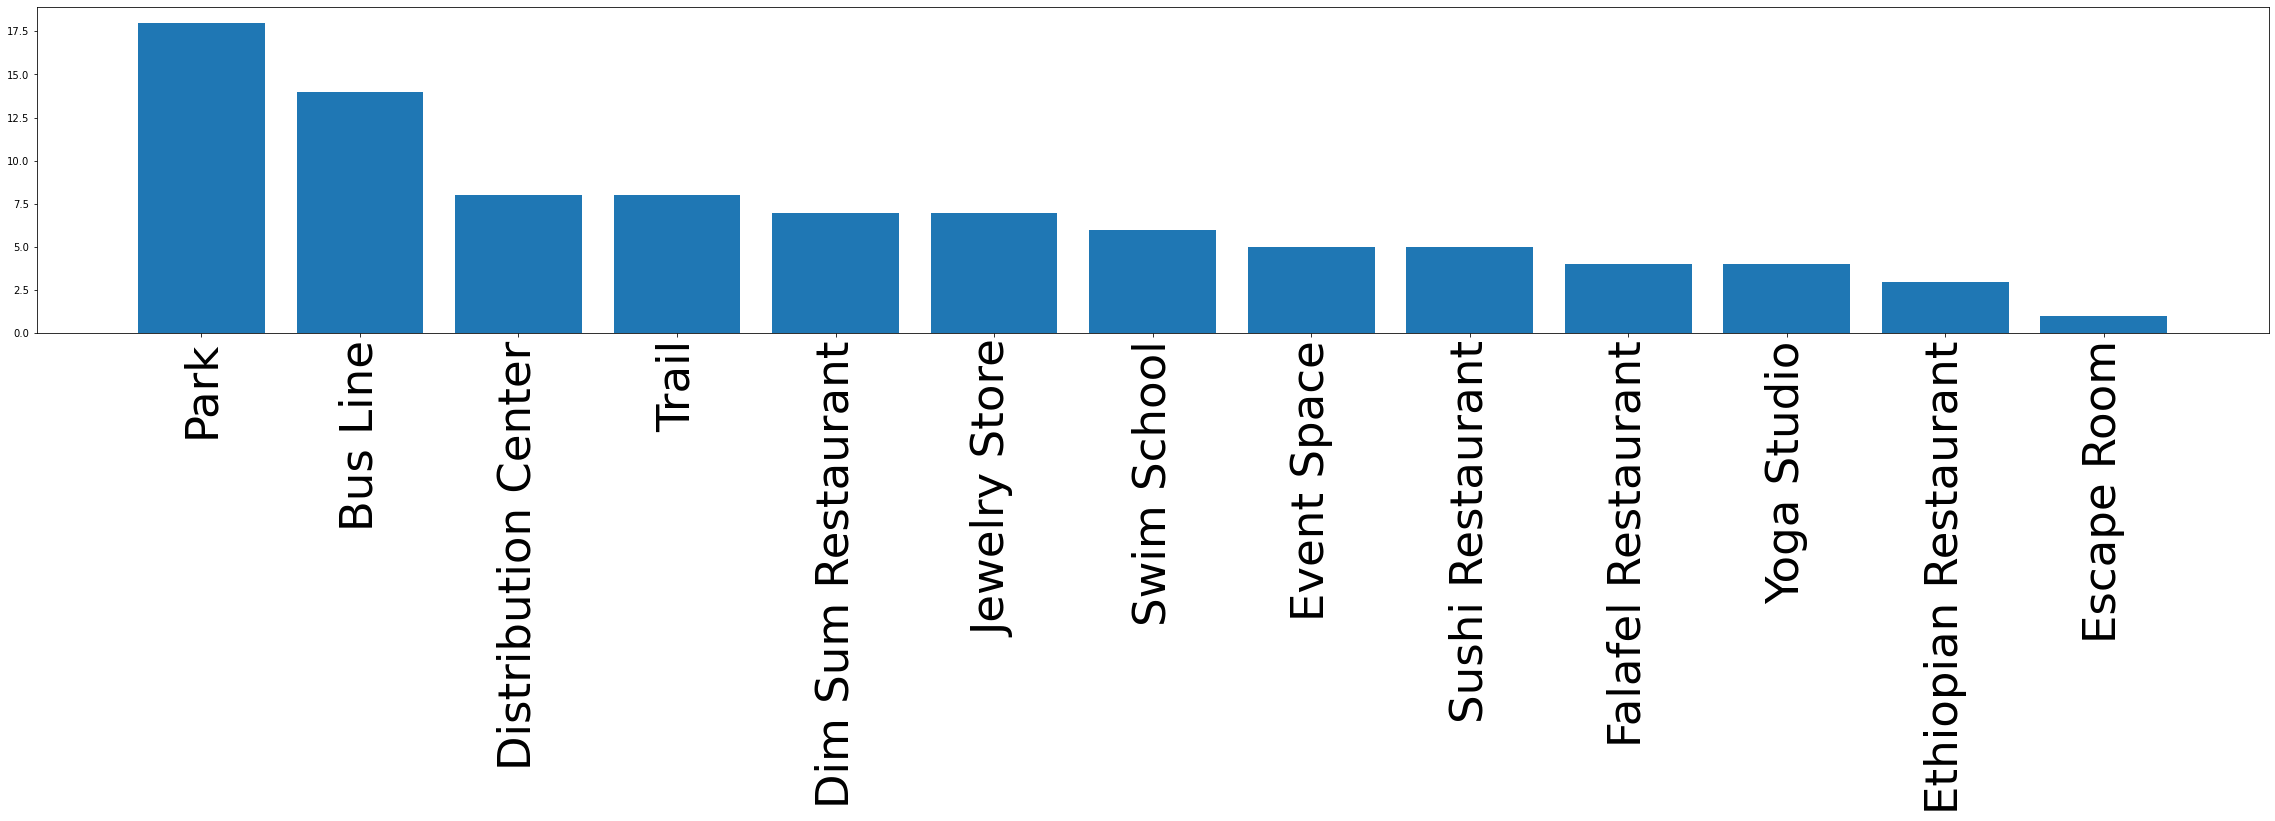

In [173]:
dfdf=Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 0, Torronto_merged.columns[[1] + list(range(5, Torronto_merged.shape[1]))]].T.reset_index()
Cluster=pd.DataFrame(data=0,columns=Torronto_store_type, index=['score'])
len2=len(dfdf.columns.values)
True_count=0
for i in range(11):
    for j in Torronto_store_type:
        if (dfdf.iloc[i,:] ==j).any(): 
            True_count=len2-pd.Series.value_counts(dfdf.loc[i,:] ==j)[False]
            Cluster[j]+=True_count*(11-i)
            
Cluster_reshape=Cluster.T[Cluster.T["score"]!=0].sort_values(by=['score'],ascending=False).T            
plt.figure(figsize=(40,6))
plt.xticks(rotation =90,size=45)
plt.bar(Cluster_reshape.columns,Cluster_reshape.iloc[0,:])            

In [78]:
Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 1, Torronto_merged.columns[[1] + list(range(5, Torronto_merged.shape[1]))]]

,Borough,Cluster Labels,first,second,third,forth,fifth,6th,7th,8th,9th,10th,11th
0,Downtown Toronto,1,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Dessert Shop,Shoe Store,Restaurant,Chocolate Shop
1,Downtown Toronto,1,Coffee Shop,Sandwich Place,Clothing Store,Café,Cosmetics Shop,Hotel,Pizza Place,Japanese Restaurant,Italian Restaurant,Theater,Ramen Restaurant
2,Downtown Toronto,1,Café,Coffee Shop,Beer Bar,Restaurant,Cocktail Bar,Gastropub,Department Store,Gym,Farmers Market,Italian Restaurant,Bakery
3,East Toronto,1,Health Food Store,Trail,Pub,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant
4,Downtown Toronto,1,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Farmers Market,Restaurant,Italian Restaurant,Beer Bar,Cheese Shop,Liquor Store,Lounge
5,Downtown Toronto,1,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Burger Joint,Japanese Restaurant,Bubble Tea Shop,Salad Place,Ramen Restaurant,Restaurant,Portuguese Restaurant
6,Downtown Toronto,1,Grocery Store,Café,Park,Coffee Shop,Candy Store,Restaurant,Italian Restaurant,Athletics & Sports,Baby Store,Nightclub,Deli / Bodega
7,Downtown Toronto,1,Coffee Shop,Café,Gym,Restaurant,Hotel,Bakery,Steakhouse,Sushi Restaurant,Bar,Clothing Store,Thai Restaurant
8,West Toronto,1,Bakery,Pharmacy,Middle Eastern Restaurant,Athletics & Sports,Bar,Bank,Supermarket,Brewery,Recording Studio,Café,Grocery Store
10,Downtown Toronto,1,Coffee Shop,Café,Aquarium,Hotel,Pizza Place,Park,Brewery,Sports Bar,Sporting Goods Shop,Scenic Lookout,Restaurant


<BarContainer object of 12 artists>

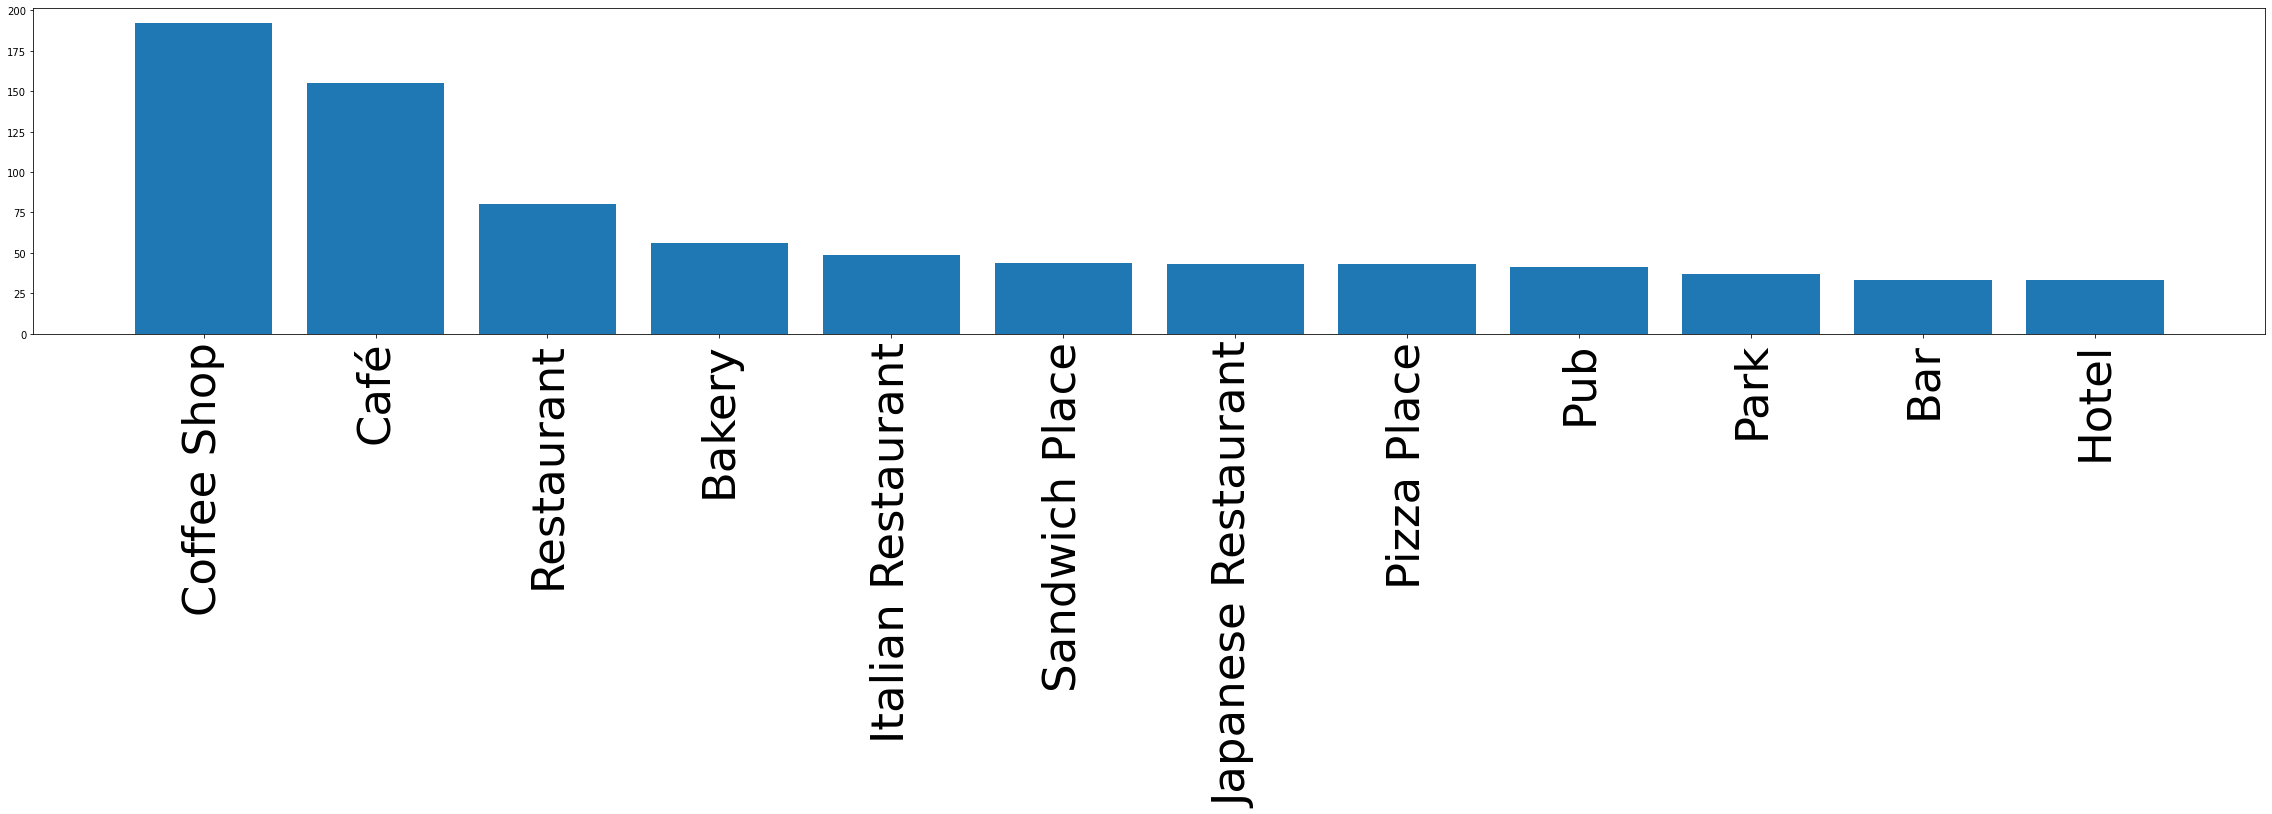

In [175]:
dfdf=Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 1, Torronto_merged.columns[[1] + list(range(5, Torronto_merged.shape[1]))]].T.reset_index()
Cluster=pd.DataFrame(data=0,columns=Torronto_store_type, index=['score'])
len2=len(dfdf.columns.values)
True_count=0
for i in range(11):
    for j in Torronto_store_type:
        if (dfdf.iloc[i,:] ==j).any(): 
            True_count=len2-pd.Series.value_counts(dfdf.loc[i,:] ==j)[False]
            Cluster[j]+=True_count*(11-i)
            
Cluster_reshape=Cluster.T[Cluster.T["score"]!=0].sort_values(by=['score'],ascending=False).T            
plt.figure(figsize=(40,6))
plt.xticks(rotation =90,size=45)
plt.bar(Cluster_reshape.columns[:12],Cluster_reshape.iloc[0,0:12])            

In [80]:
Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 2, Torronto_merged.columns[[1] + list(range(5, Torronto_merged.shape[1]))]]

,Borough,Cluster Labels,first,second,third,forth,fifth,6th,7th,8th,9th,10th,11th
9,East York/East Toronto,2,Convenience Store,Park,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


<BarContainer object of 9 artists>

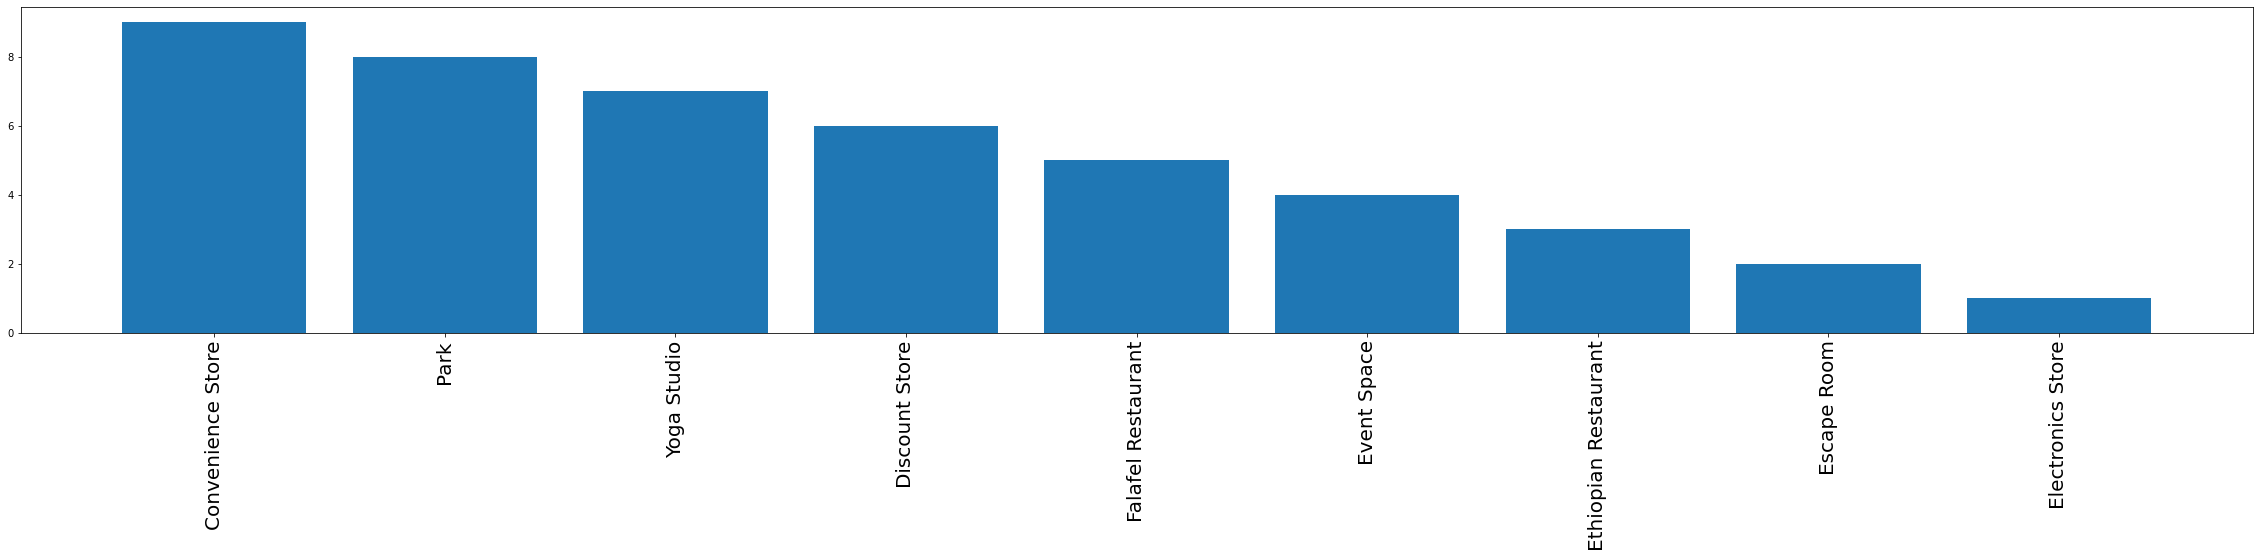

In [81]:
dfdf=Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 2, Torronto_merged.columns[[1] + list(range(5, Torronto_merged.shape[1]))]].T.reset_index()
Cluster=pd.DataFrame(data=0,columns=Torronto_store_type, index=['score'])
len2=len(dfdf.columns.values)
True_count=0
for i in range(11):
    for j in Torronto_store_type:
        if (dfdf.iloc[i,:] ==j).any(): 
            True_count=len2-pd.Series.value_counts(dfdf.loc[i,:] ==j)[False]
            Cluster[j]+=True_count*(11-i)
            
Cluster_reshape=Cluster.T[Cluster.T["score"]!=0].sort_values(by=['score'],ascending=False).T            
plt.figure(figsize=(40,6))
plt.xticks(rotation =90,size=20)
plt.bar(Cluster_reshape.columns,Cluster_reshape.iloc[0,:])            

In [82]:
Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 3, Torronto_merged.columns[[1] + list(range(5, Torronto_merged.shape[1]))]]

,Borough,Cluster Labels,first,second,third,forth,fifth,6th,7th,8th,9th,10th,11th
19,Central Toronto,3,Garden,Health & Beauty Service,Home Service,Yoga Studio,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant


<BarContainer object of 9 artists>

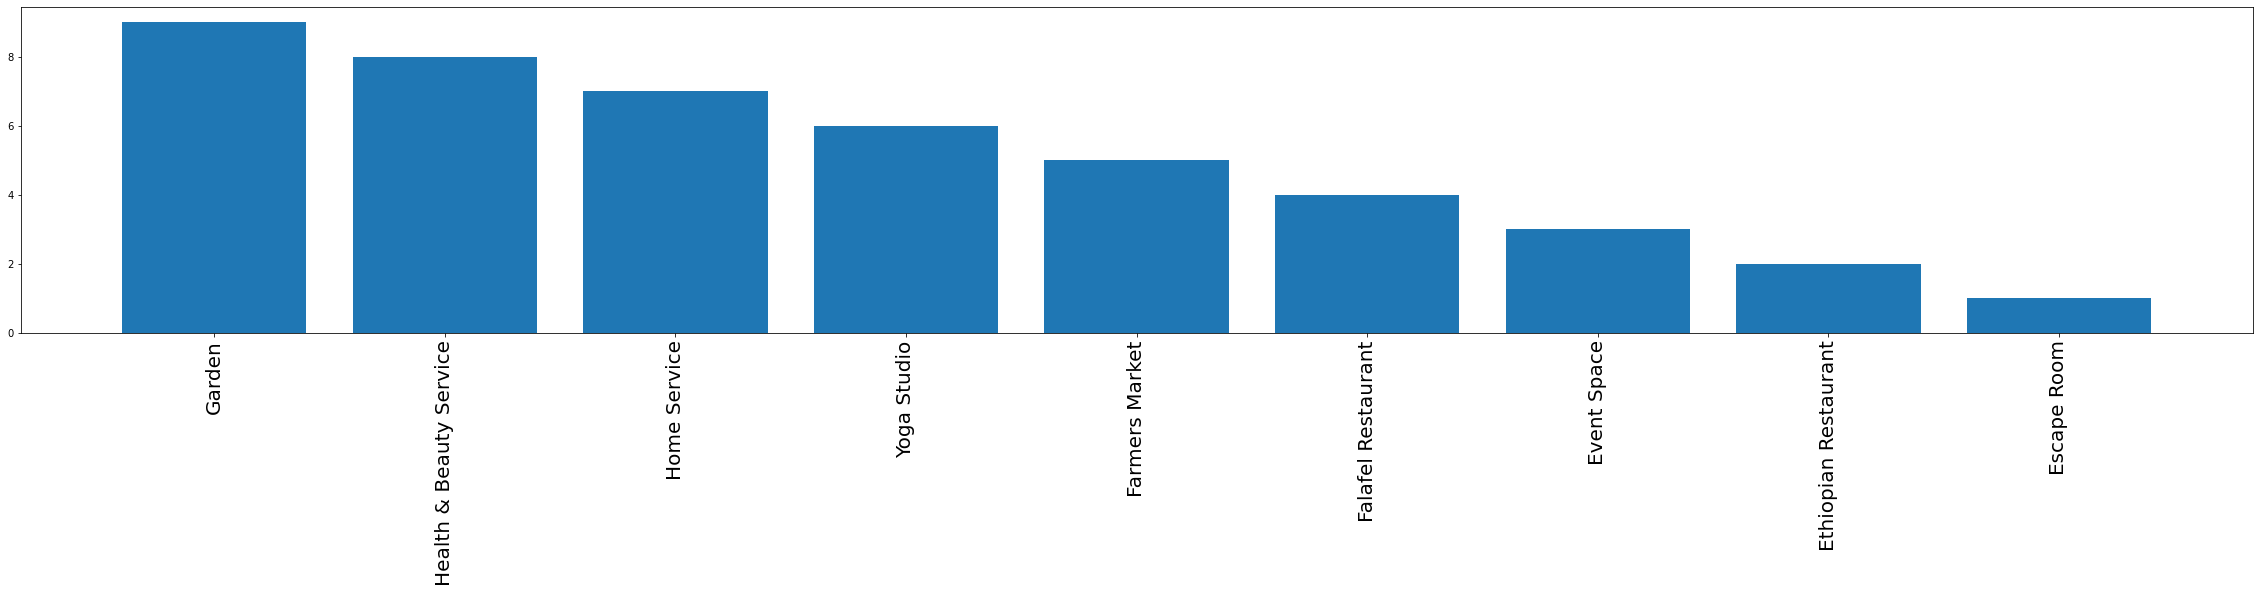

In [83]:
dfdf=Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 3, Torronto_merged.columns[[1] + list(range(5, Torronto_merged.shape[1]))]].T.reset_index()
Cluster=pd.DataFrame(data=0,columns=Torronto_store_type, index=['score'])
len2=len(dfdf.columns.values)
True_count=0
for i in range(11):
    for j in Torronto_store_type:
        if (dfdf.iloc[i,:] ==j).any(): 
            True_count=len2-pd.Series.value_counts(dfdf.loc[i,:] ==j)[False]
            Cluster[j]+=True_count*(11-i)
            
Cluster_reshape=Cluster.T[Cluster.T["score"]!=0].sort_values(by=['score'],ascending=False).T            
plt.figure(figsize=(40,6))
plt.xticks(rotation =90,size=20)
plt.bar(Cluster_reshape.columns,Cluster_reshape.iloc[0,:])            

In [84]:
Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 4, Torronto_merged.columns[[1] + list(range(5, Torronto_merged.shape[1]))]]

,Borough,Cluster Labels,first,second,third,forth,fifth,6th,7th,8th,9th,10th,11th
33,Downtown Toronto,4,Park,Playground,Trail,Diner,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


<BarContainer object of 9 artists>

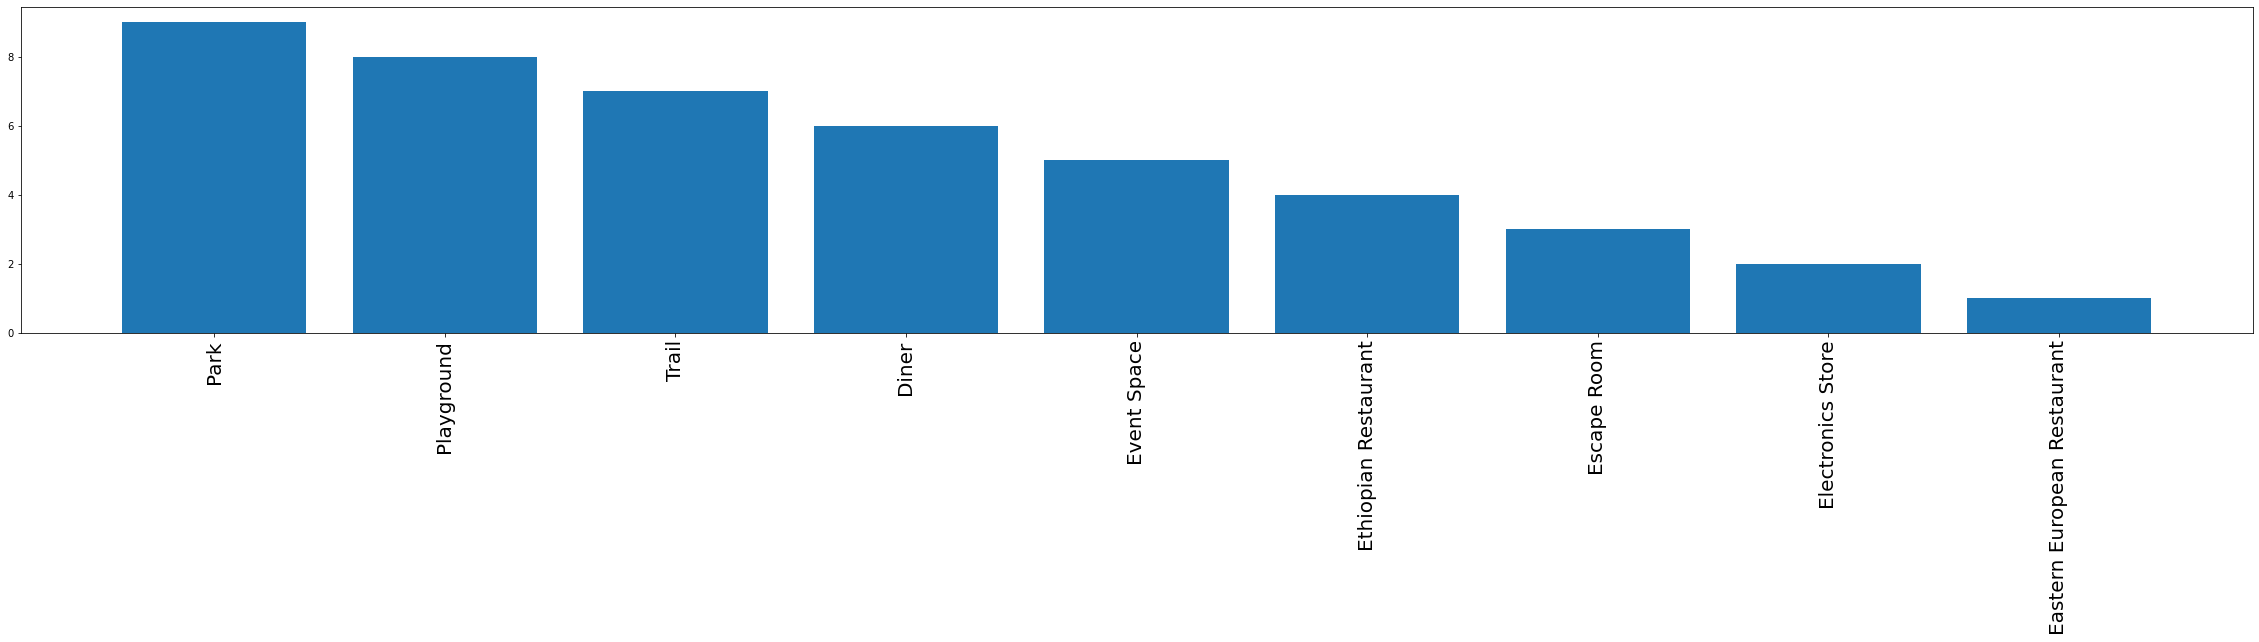

In [85]:
dfdf=Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 4, Torronto_merged.columns[[1] + list(range(5, Torronto_merged.shape[1]))]].T.reset_index()
Cluster=pd.DataFrame(data=0,columns=Torronto_store_type, index=['score'])
len2=len(dfdf.columns.values)
True_count=0
for i in range(11):
    for j in Torronto_store_type:
        if (dfdf.iloc[i,:] ==j).any(): 
            True_count=len2-pd.Series.value_counts(dfdf.loc[i,:] ==j)[False]
            Cluster[j]+=True_count*(11-i)
            
Cluster_reshape=Cluster.T[Cluster.T["score"]!=0].sort_values(by=['score'],ascending=False).T            
plt.figure(figsize=(40,6))
plt.xticks(rotation =90,size=20)
plt.bar(Cluster_reshape.columns,Cluster_reshape.iloc[0,:])            

In [86]:
kmeans_NY.labels_

array([2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 1, 3, 2, 3, 2, 1, 1, 1, 2, 2,
       2, 1, 0, 2, 2, 1, 2, 1, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2], dtype=int32)

In [87]:
kmeans_NY.predict(manhattan_grouped_clustering)

array([2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 1, 3, 2, 3, 2, 1, 1, 1, 2, 2,
       2, 1, 0, 2, 2, 1, 2, 1, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2], dtype=int32)

In [88]:
kmeans_Toronto.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [89]:
kmeans_Toronto.predict(T_OH_group)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [90]:
ReformToronto=pd.DataFrame(data=0,columns=manhattan_store_type, index=T_OH_group.index.values)


In [91]:
len(manhattan_store_type)

331

In [92]:

for col in T_OH_group:
    if col in manhattan_store_type:
        ReformToronto[col]=T_OH_group[col]
ReformToronto.shape

(39, 331)

In [93]:
kmeans_NY.predict(ReformToronto)

array([2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 4, 1, 2, 2, 3, 2, 2, 3, 2, 4, 2, 2, 1], dtype=int32)

In [94]:

Top11_Toronto_to_NY=Top11
Top11_Toronto_to_NY['Cluster Labels']=kmeans_NY.predict(ReformToronto)

Torronto_merged2 = df_Toronto

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Torronto_merged2 = Torronto_merged2.join(Top11_Toronto_to_NY.set_index('Neighborhood'), on='Neighborhood')


In [176]:
Torronto_merged2.head(13)

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,first,second,third,forth,fifth,6th,7th,8th,9th,10th,11th
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Dessert Shop,Shoe Store,Restaurant,Chocolate Shop
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Coffee Shop,Sandwich Place,Clothing Store,Café,Cosmetics Shop,Hotel,Pizza Place,Japanese Restaurant,Italian Restaurant,Theater,Ramen Restaurant
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Café,Coffee Shop,Beer Bar,Restaurant,Cocktail Bar,Gastropub,Department Store,Gym,Farmers Market,Italian Restaurant,Bakery
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Health Food Store,Trail,Pub,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Farmers Market,Restaurant,Italian Restaurant,Beer Bar,Cheese Shop,Liquor Store,Lounge
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,1,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Burger Joint,Japanese Restaurant,Bubble Tea Shop,Salad Place,Ramen Restaurant,Restaurant,Portuguese Restaurant
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,1,Grocery Store,Café,Park,Coffee Shop,Candy Store,Restaurant,Italian Restaurant,Athletics & Sports,Baby Store,Nightclub,Deli / Bodega
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,1,Coffee Shop,Café,Gym,Restaurant,Hotel,Bakery,Steakhouse,Sushi Restaurant,Bar,Clothing Store,Thai Restaurant
8,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,1,Bakery,Pharmacy,Middle Eastern Restaurant,Athletics & Sports,Bar,Bank,Supermarket,Brewery,Recording Studio,Café,Grocery Store
9,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106,2,Convenience Store,Park,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [95]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Torronto_merged2['Latitude'], Torronto_merged2['Longitude'], Torronto_merged2['Neighborhood'], Torronto_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [96]:
ReformNy=pd.DataFrame(data=0,columns=Torronto_store_type, index=manhattan_grouped_clustering.index.values)

for col in manhattan_grouped_clustering:
    if col in Torronto_store_type:
        ReformNy[col]=manhattan_grouped_clustering[col]
ReformNy.head()


,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,0,0,0,0,0,0.011628,0.0,0,0.000000,0.000000,0.0,0.00,0.011628,0,0.023256,0.0,0.000000,0.011628,0.0,0.011628,0,0,0,0,0.000000,0.0,0,0.011628,0.0,0.023256,0.000000,0.0,0.0,0.0,0.00,0.023256,0.011628,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.011628,0.0,0,0.0,0.046512,0.000000,0.069767,0.0,0,0,0,0,0,0.0,0.0,0.011628,0,0.0,0.0,0.00,0.000000,0.0,0.011628,0.011628,0.0,0.000000,0.0,0,0.0,0,0.0,0.00,0.0,0.011628,0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0,0.00,0.00,0.0,0.023256,0.0,0.0,0.000000,0.000000,0.0,0,0.00,0.0,0.011628,0,0.0,0.0,0.000000,0.00,0.0,0.011628,0,0.023256,0.00,0.011628,0.034884,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0.0,0.046512,0.0,0,0.023256,0.000000,0.00,0.0,0.0,0.011628,0.011628,0.000000,0.00,0.000000,0,0.0,0,0.0,0,0,0.011

In [97]:
kmeans_Toronto.predict(ReformNy)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Let's go to Seoul!!!

In [98]:
url = "https://en.wikipedia.org/wiki/List_of_districts_of_Seoul"
request= requests.get(url).text
soup = BeautifulSoup(request, 'html.parser')
column_names = ['Gu','Dong']
df=pd.DataFrame(columns=column_names)
df2=pd.DataFrame(columns=column_names)

table_contents=[]
table=soup.find_all("table",{"class":"wikitable sortable"})


infoPrint=[]
for a in table[1].find_all("tr"):
    infolist = []
    
    for b in a.find_all("td"):
        info = b.get_text()
        infolist.append(info)
    infoPrint.append(infolist)
df.head()

aq=[]
for i in range(len(infoPrint[1:])):
    
    aq.append(infoPrint[1:][i][0])
aq = [word.strip('\n') for word in aq ] 

aq2=[]
for i in range(len(infoPrint[1:])):
    
    aq2.append(infoPrint[1:][i][1].split("\n")[1:-1])
    
df["Gu"]=aq
df['Dong']=aq2
df.head()

j=0
for i in range(len(df.index.values)):
    for k in range(len(df.loc[i,"Dong"])):
        df2.loc[j]=[df.loc[i,"Gu"],df.loc[i,"Dong"][k]]
        j=j+1
        
df2=df2.drop(index=108)
df2=df2.drop(index=109)
df2=df2.drop(index=256)
df2=df2.reset_index(drop=True)

In [99]:

latitude_list=[]
longitude_list=[] 
for i in range(len(df2.index.values)):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(df2.loc[i,"Dong"])
    latitude_list.append(location.latitude)
    longitude_list.append(location.longitude)
    

df2["latitude"]=latitude_list
df2["longitude"]=longitude_list  #delete for delete error

In [100]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = 'FPG1QR51MSXLF5UTJNKZOUEAAPMCOR500TT3SUFLYNWOCJHT' 
VERSION = '20180605' # Foursquare API version
LIMIT = 77 # A default Foursquare API limit value

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        for i in range(len(results)):           
            venues_list.append([(
            names, 
            lat, 
            lng, 
            results[i]['venue']['name'], 
            results[i]['venue']['location']['lat'], 
            results[i]['venue']['location']['lng'],  
            results[i]['venue']['categories'][0]['name'])])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Dong', 
                  'Dong Latitude', 
                  'Dong Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
Seoul_venues = getNearbyVenues(names=df2['Dong'],
                                   latitudes=df2['latitude'],
                                   longitudes=df2['longitude'])
df_Seoul=pd.get_dummies(Seoul_venues[["Venue Category"]],prefix="", prefix_sep="")
df_Seoul.insert(0,"Dong",Seoul_venues["Dong"])
df_Seoul.shape
df_Seoul_group=df_Seoul.groupby("Dong").mean()

In [107]:
df_Seoul=pd.read_csv("/resources/data/df_Seoul.csv")
df_Seoul_group=pd.read_csv("/resources/data/df_Seoul_group.csv")

In [108]:
df_Seoul_group.index=df_Seoul_group["Dong"]

In [109]:
df_Seoul_group.drop(["Dong"],axis=1,inplace=True)

In [110]:
df_Seoul_group.index.values

array(['Ahyeon-dong', 'Amsa-dong', 'Anam-dong', 'Apgujeong-dong',
       'Bangbae-dong', 'Banghak-dong', 'Banghwa-dong', 'Bangi-dong',
       'Banpo-dong', 'Beon-dong', 'Bomun-dong', 'Bon-dong',
       'Bongcheon-dong', 'Bongwon-dong', 'Buam-dong', 'Bugahyeon-dong',
       'Bukgajwa-dong', 'Bulgwang-dong', 'Chang-dong', 'Changcheon-dong',
       'Changjeon-dong', 'Changsin-dong', 'Cheongdam-dong',
       'Cheonggu-dong', 'Cheongnyangni-dong', 'Cheongpa-dong',
       'Cheongun-dong', 'Cheonho-dong', 'Cheonwang-dong',
       'Cheonyeon-dong', 'Chungjeongno-dong', 'Daebang-dong',
       'Daechi-dong', 'Daeheung-dong', 'Daehyeon-dong', 'Daejo-dong',
       'Daerim-dong', 'Daesin-dong', 'Dangin-dong', 'Dangsan-dong',
       'Dapsimni-dong', 'Dasan-dong', 'Deungchon-dong', 'Dobong-dong',
       'Dogok-dong', 'Dohwa-dong', 'Doksan-dong', 'Donam-dong',
       'Donggyo-dong', 'Donghwa-dong', 'Dongjak-dong', 'Dongseon-dong',
       'Dongsomun-dong', 'Dorim-dong', 'Doseon-dong', 'Dunchon-dong',
 

In [111]:
ReformSeoul=pd.DataFrame(data=0,columns=manhattan_store_type, index=df_Seoul_group.index.values)

for col in df_Seoul_group:
    if col in manhattan_store_type:
        ReformSeoul[col]=df_Seoul_group[col]
ReformSeoul.head()

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Peruvian Roast Chicken Joint,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restau

In [123]:
df3=df2
df4=pd.DataFrame()
df4["Dong"]=ReformSeoul.index
df4["Cluster Labels"]=kmeans_NY.predict(ReformSeoul)
df4.head()

,Dong,Cluster Labels
0,Ahyeon-dong,0
1,Amsa-dong,0
2,Anam-dong,0
3,Apgujeong-dong,1
4,Bangbae-dong,3


In [124]:
df2.head()

,Gu,Dong,latitude,longitude
0,Dobong-gu,Dobong-dong,37.682606,127.042541
1,Dobong-gu,Banghak-dong,37.664420,127.033330
2,Dobong-gu,Ssangmun-dong,37.653470,127.027150
3,Dobong-gu,Chang-dong,37.653182,127.047699
4,Dongdaemun-gu,Cheongnyangni-dong,37.588207,127.046252


In [125]:

df_merged=pd.merge(df3,df4,how='inner',on="Dong")

In [126]:
Seoul_merged=df_merged

In [127]:
Seoul_merged.head()

,Gu,Dong,latitude,longitude,Cluster Labels
0,Dobong-gu,Dobong-dong,37.682606,127.042541,0
1,Dobong-gu,Banghak-dong,37.664420,127.033330,0
2,Dobong-gu,Ssangmun-dong,37.653470,127.027150,0
3,Dobong-gu,Chang-dong,37.653182,127.047699,2
4,Dongdaemun-gu,Cheongnyangni-dong,37.588207,127.046252,0


In [128]:
df_merged

,Gu,Dong,latitude,longitude,Cluster Labels
0,Dobong-gu,Dobong-dong,37.682606,127.042541,0
1,Dobong-gu,Banghak-dong,37.664420,127.033330,0
2,Dobong-gu,Ssangmun-dong,37.653470,127.027150,0
3,Dobong-gu,Chang-dong,37.653182,127.047699,2
4,Dongdaemun-gu,Cheongnyangni-dong,37.588207,127.046252,0
5,Dongdaemun-gu,Dapsimni-dong,37.569606,127.056638,0
6,Dongdaemun-gu,Hoegi-dong,37.594610,127.050942,2
7,Dongdaemun-gu,Hwigyeong-dong,37.587730,127.065260,2
8,Dongdaemun-gu,Imun-dong,37.600210,127.061240,2
9,Dongdaemun-gu,Jegi-dong,37.578393,127.034640,0


In [129]:
# create map
map_clusters = folium.Map(location=[37.478794, 126.992923], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Seoul_merged['latitude'], Seoul_merged['longitude'], Seoul_merged['Dong'], Seoul_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [130]:
ReformSeoul2=pd.DataFrame(data=0,columns=Torronto_store_type, index=df_Seoul_group.index.values)

for col in df_Seoul_group:
    if col in Torronto_store_type:
        ReformSeoul2[col]=df_Seoul_group[col]
ReformSeoul2.head()

,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
Ahyeon-dong,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0,0.0,0.153846,0,0.0,0,0,0.0,0.0,0.076923,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0,0.0,0.000000,0,0.0,0.0,0,0.000000,0.0,0,0,0.000000,0.0,0.230769,0,0,0,0,0.0,0.0,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.00000,0.000000,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0.000000,0.0,0.0,0.0,0,0.153846,0.0,0,0,0.0,0,0.0,0.0,0,0.000000,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0.00000,0.00000,0.0,0,0,0.0,0.0,0.000

In [131]:
df5=pd.DataFrame()
df5["Dong"]=ReformSeoul.index
df5["Cluster Labels"]=kmeans_Toronto.predict(ReformSeoul2)
df5.head()
df_merged2=pd.merge(df3,df5,how='inner',on="Dong")

In [132]:
Seoul_merged2=df_merged2

In [133]:
# create map
map_clusters = folium.Map(location=[37.478794, 126.992923], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Seoul_merged2['latitude'], Seoul_merged2['longitude'], Seoul_merged2['Dong'], Seoul_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Conclusion

My findings have enabled people to move more appropriately. People will be able to adapt faster and live happily in similar circumstances. These models and methodologies could be applied to any city. My code has been released. If you want to move to other cities or travel to , analyze yourself the same way. It would be a good way to live in the most familiar environment.

Future Discussion

Toronto modeling is not perfect. Because too many areas belonged to one cluster. This needs to be supplemented. For now, there can be many causes of the problem. 1. The data received from FourSquare is too formal. 2. Indeed, their areas are all alike. 3. No suitable modeling methods have been found. It seems that follow-up research is needed to solve these things.